In [7]:
import pandas as pd
df = pd.read_pickle('data.pkl')
df.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,GDP Percent Increase
0,1952,Stevenson,Eisenhower,44.60,2.40,190,43.9
1,1956,Eisenhower,Stevenson,57.76,2.89,0,34.6
2,1960,Nixon,Kennedy,49.91,0.85,0,22.8
3,1964,Johnson,Goldwater,61.34,4.21,1,41.4
4,1968,Humphrey,Nixon,49.60,3.02,146,30.6


In [8]:
df.corr()[['Incumbent Party Vote Share']]


,Incumbent Party Vote Share
Year,-0.219182
Incumbent Party Vote Share,1.000000
Average Recent Growth in Personal Incomes,0.766281
US Military Fatalities per Million,-0.364377
GDP Percent Increase,0.638171


In [9]:
features = ['US Military Fatalities per Million', 'GDP Percent Increase']

target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
maes = []
r2s = []
mses = []
rmses = []
model = LinearRegression()
for year in df['Year']:
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparamaters by instantiating this class
    model = LinearRegression()
    
    # Arrange data into X features matrix and y target vector
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    # Fit the model to your data by calling the fit() method of the estimator
    model.fit(X_train, y_train)
    
    # Apply the model to new data: predict labels for unknown data using predict() method
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')
    
    
    #Do the same for mse, rmse and r2
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    print(f'Mean squared error for {year} = {mse}')
    
    rmse = np.sqrt(mse)
    rmses.append(rmse)
    print(f'RMS error for {year} = {rmse}')
    
    r2 = r2_score(y, model.predict(X)) #Acts on entire set not just 2 tests
    r2s.append(r2)
    print(f'R2 for {year} = {r2}')


Fit Linear Regression on all years except 1952
Absolute Error on prediction for 1952 = 8.178562245746335
Mean squared error for 1952 = 66.88888040754733
RMS error for 1952 = 8.178562245746335
R2 for 1952 = 0.5871117839590851
Fit Linear Regression on all years except 1956
Absolute Error on prediction for 1956 = 3.181865583257874
Mean squared error for 1956 = 10.124268589920971
RMS error for 1956 = 3.181865583257874
R2 for 1956 = 0.6734968000345025
Fit Linear Regression on all years except 1960
Absolute Error on prediction for 1960 = 1.7116166725013287
Mean squared error for 1960 = 2.9296316335845205
RMS error for 1960 = 1.7116166725013287
R2 for 1960 = 0.6748787639921885
Fit Linear Regression on all years except 1964
Absolute Error on prediction for 1964 = 5.307911760266812
Mean squared error for 1964 = 28.173927254778725
RMS error for 1964 = 5.307911760266812
R2 for 1964 = 0.6675882777468531
Fit Linear Regression on all years except 1968
Absolute Error on prediction for 1968 = 5.675273

In [11]:
#graphing 3d Linear Regressions
from mpl_toolkits import mplot3d
#func from lecture
def viz3D(fitted_model, df, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    features : list of strings, name of features 1 & 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    ax.scatter3D(df[feature1], df[feature2], df[target], color='r')
    
    
    #Add the data points
    #ax.scatter3D(s_data.X3,s_data.X2,s_data.X1, color='r')
    plt.show()

<IPython.core.display.Javascript object>


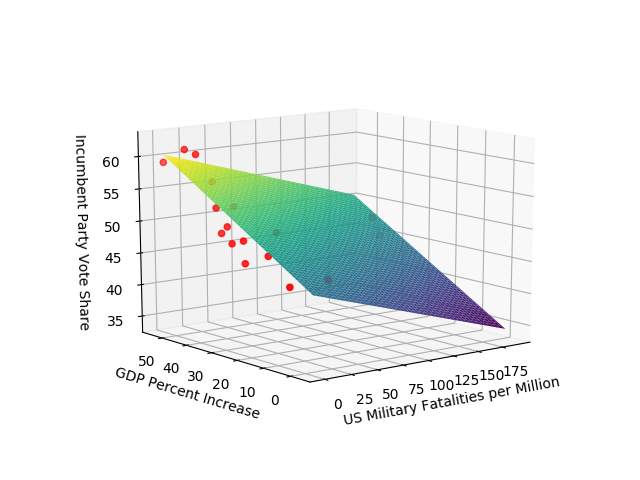

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
viz3D(model, df, features, target)



<IPython.core.display.Javascript object>


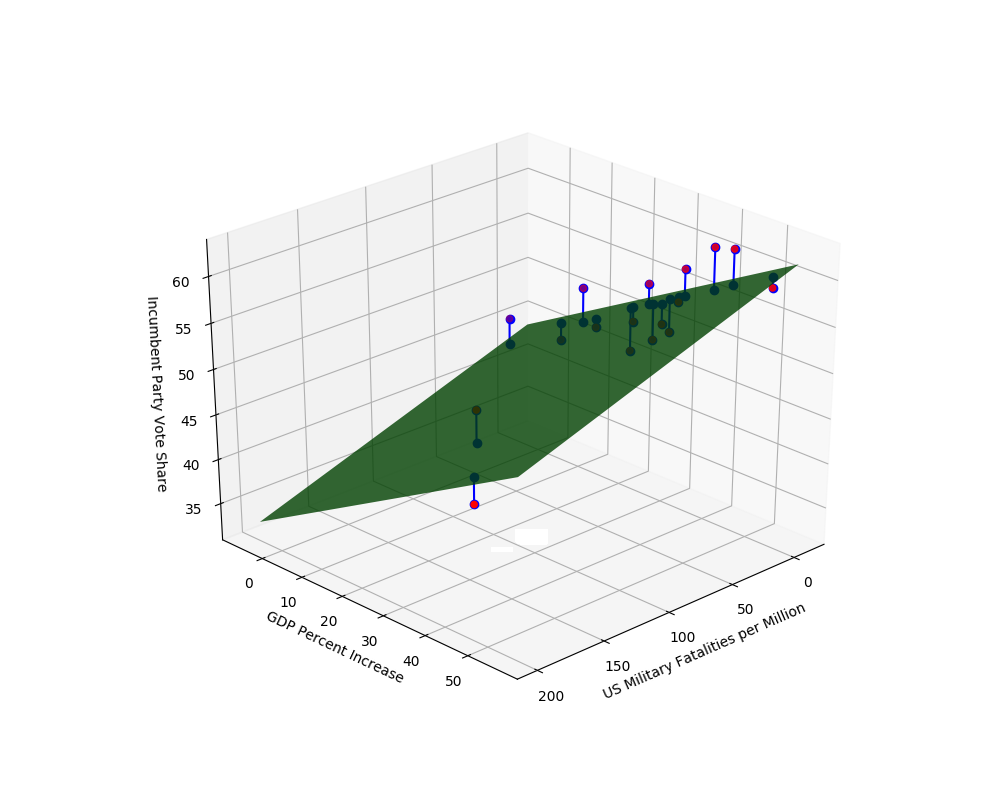

Text(0.5, 0, 'US Military Fatalities per Million')

In [49]:
# My old code for 3d graph from pre-course

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()

f1,f2 = features
ax = plt.axes(projection='3d', label='zxzx')
ax.scatter3D(df[f1],df[f2], df[target], color='r')
model = LinearRegression()
model.fit(df[features], df[target])

#I could have just also used np.linspace to generate the regression plane
xx_coef = model.coef_[0]
yy_coef = model.coef_[1]
xrange = np.array(ax.get_xlim())
yrange = np.array(ax.get_ylim())
xx,yy = np.meshgrid(xrange, yrange)
z = xx*xx_coef + yy*yy_coef + model.intercept_
ax.plot_surface(xx, yy, z,  alpha=.8, color='g')

#New Addition: Error lines
z_pred = model.predict(df[features])
for i in range(len(z_pred)):
    
    x,y = df[f1][i], df[f2][i]
    z = df[target][i]
    ax.plot((x,x), (y,y), (z,z_pred[i]), 'b-o')
    


ax.set_zlabel(target)
ax.set_ylabel(f2)
ax.set_xlabel(f1)


In [50]:
#Run This to animate the chart above
def init2():
  ax = plt.axes(projection='3d')
  return fig
def animate2(i):
    angle = i if i<=90 else 90- (i-90)
    ax.view_init(30, angle)
    return (fig,)
anim2 = animation.FuncAnimation(fig, animate2,
                               frames=180, interval=30, blit=True)


In [51]:
#Video animation
HTML(anim2.to_html5_video())